In [5]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
#sys._enablelegacywindowsfsencoding()
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.
cwd = os.getcwd()

In [6]:
#path = "C:/Users/Andres/Google Drive/Facultad/4° CUATRIMESTRE/Organización de Datos/Trabajo Práctico/train.csv"
path = cwd+"/train.csv"
df = pd.read_csv(path, index_col='id', parse_dates=['fecha'])

In [7]:
print(f"Columnas: {df.columns}")
df['ciudad'].value_counts()

Columnas: Index(['titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')


Querétaro                       12646
Benito Juárez                   11014
Zapopan                         10360
San Luis Potosí                  7925
Mérida                           7162
Monterrey                        6946
Alvaro Obregón                   6633
Cuauhtémoc                       6614
Naucalpan de Juárez              6554
Miguel Hidalgo                   5795
Atizapán de Zaragoza             5783
Tlalpan                          5721
Huixquilucan                     5718
Coyoacán                         5293
Puebla                           4636
Guadalajara                      4006
San Andrés Cholula               3805
Cancún                           3779
Cuernavaca                       3775
Chihuahua                        3757
Tlalnepantla de Baz              3588
Cuautitlán Izcalli               3408
Tlajomulco de Zúñiga             3254
Gustavo A. Madero                3141
Iztapalapa                       3093
Cuajimalpa de Morelos            3020
Tijuana     

In [8]:
df['ed.cult.cercana'] = df['escuelascercanas'] + df['centroscomercialescercanos']
df['precio(U$S)'] = df['precio']/20
df['extras(P/S/G)'] = df['gimnasio'] + df['piscina']+ df['usosmultiples']
df.drop(['escuelascercanas','centroscomercialescercanos','precio','gimnasio','piscina','usosmultiples'],axis=1,inplace =True)

In [9]:
"FILTRO LOS NAN"
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49881 entries, 53461 to 146867
Data columns (total 19 columns):
titulo             49881 non-null object
descripcion        49881 non-null object
tipodepropiedad    49881 non-null object
direccion          49881 non-null object
ciudad             49881 non-null object
provincia          49881 non-null object
antiguedad         49881 non-null float64
habitaciones       49881 non-null float64
garages            49881 non-null float64
banos              49881 non-null float64
metroscubiertos    49881 non-null float64
metrostotales      49881 non-null float64
idzona             49881 non-null float64
lat                49881 non-null float64
lng                49881 non-null float64
fecha              49881 non-null datetime64[ns]
ed.cult.cercana    49881 non-null float64
precio(U$S)        49881 non-null float64
extras(P/S/G)      49881 non-null float64
dtypes: datetime64[ns](1), float64(12), object(6)
memory usage: 7.6+ MB


In [24]:
"UNIFICO ALGUNOS VALORES"
df.loc[df['tipodepropiedad'] == 'Casa uso de suelo', 'tipodepropiedad'] = 'Casa'
df.loc[df['tipodepropiedad'] == 'Departamento Compartido', 'tipodepropiedad'] = 'Departamento'
df.loc[df['tipodepropiedad'] == 'Apartamento', 'tipodepropiedad'] = 'Departamento'
df.loc[df['tipodepropiedad'] == 'Edificio', 'tipodepropiedad'] = 'Departamento'
df.loc[df['tipodepropiedad'] == 'Local Comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Bodega comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Terreno comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Oficina Comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Local en centro comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Nave industrial', 'tipodepropiedad'] = 'Terreno industrial'
df['tipodepropiedad'].value_counts()

Casa                             161722
Departamento                      58878
Terreno                            9945
Oficina comercial                  7693
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Otros                               134
Terreno industrial                  107
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [11]:
"AGREGO COLUMNA DE CONTADOR DE PROPIEDADES"
df['cantdepropiedades'] = df.groupby('ciudad')['ciudad'].transform('count')
"FILTRO PARA QUE QUEDEN LAS PRINCIPALES 5"
df_filtrado = df[df['cantdepropiedades']>=7162]
df_filtrado['aux'] = 1
df_filtrado.head()

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,ed.cult.cercana,precio(U$S),extras(P/S/G),cantdepropiedades,aux
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Edificio,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,2015-08-23,0.00,113650.00,0.00,11014.00,1
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Edificio,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,95.00,95.00,47835.00,nan,nan,2016-06-07,0.00,57500.00,0.00,10360.00,1
51180,mi 2° credito,<p>mi 2&deg; credito<br />para todos aquellos ...,Casa,MI 2° CREDITO,San Luis Potosí,San luis Potosí,0.00,3.00,1.00,1.00,100.00,nan,87542.00,22.20,-101.02,2013-01-03,2.00,24400.00,0.00,7925.00,1
47890,hermosa casa en zibata queretaro 170m²,<p><strong>casa </strong>en venta en fracciona...,Casa,"Pitahayas 2 - 58, Zibata",Querétaro,Querétaro,0.00,3.00,2.00,2.00,170.00,141.00,83666.00,20.68,-100.32,2013-08-12,2.00,75000.00,1.00,12646.00,1
130216,casa matias romero - sión bancaria,flamante casa habitación en condominio horizon...,Casa,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,20.00,nan,0.00,nan,227.00,185.00,50003995.00,19.37,-99.15,2015-03-31,0.00,150000.00,0.00,11014.00,1


In [12]:
"CANTIDAD POR TIPO DE PROPIEDAD EN VENTA DE LAS PRINCIPALES 5 CIUDADES"
grupo_ciudad = df_filtrado.groupby('ciudad')
grupo_ciudad_propiedad = df_filtrado.groupby(['ciudad','tipodepropiedad'])[['aux']]
df_grupo_ciudad_propiedad = grupo_ciudad_propiedad.aggregate(np.sum)

In [13]:
df_grupo_ciudad_propiedad = df_grupo_ciudad_propiedad.reset_index()

Text(0, 0.5, 'Cantidad de Viviendas Publicadas')

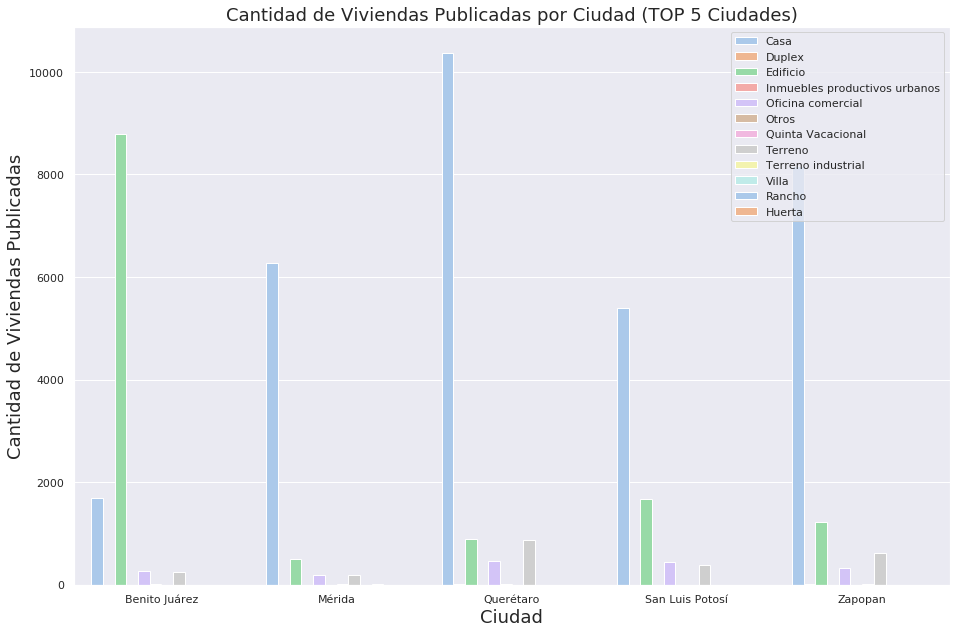

In [14]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
g = sns.barplot(x="ciudad",y="aux",hue="tipodepropiedad", data=df_grupo_ciudad_propiedad, palette="pastel")
g.legend(loc='upper right')
g.set_title("Cantidad de Viviendas Publicadas por Ciudad (TOP 5 Ciudades)", fontsize=18)
g.set_xlabel("Ciudad", fontsize=18)
g.set_ylabel("Cantidad de Viviendas Publicadas", fontsize=18)

In [15]:
df_filtrado.head()
grupo_ciudad_precio = df_filtrado.groupby(['ciudad','tipodepropiedad'])[['precio(U$S)']]
df_grupo_ciudad = grupo_ciudad_precio.aggregate(np.mean)
grupo_ciudad_precio.count()

precio(U$S)
ciudad          tipodepropiedad                           
Benito Juárez   Casa                                  1685
                Duplex                                   5
                Edificio                              8789
                Inmuebles productivos urbanos            5
                Oficina comercial                      265
                Otros                                    7
                Quinta Vacacional                        1
                Terreno                                253
                Terreno industrial                       2
                Villa                                    2
Mérida          Casa                                  6267
                Duplex                                   1
                Edificio                               495
                Oficina comercial                      192
                Quinta Vacacional                        6
                Rancho                                   1
                Terreno                                186
                Terreno industrial                       2
                Villa                                   11
Querétaro       Casa                                 10366
                Duplex                                  15
                Edificio                               902
                Inmuebles productivos urbanos            5
                Oficina comercial                      459
                Otros                                   20
                Quinta Vacacional                        2
                Rancho                                   1
                Terreno                                872
                Terreno industrial                       2
                Villa                                    2
San Luis Potosí Casa                                  5396
                Edificio                              1674
                Inmuebles productivos urbanos            3
                Oficina comercial                      448
                Otros                                    2
                Quinta Vacacional                        1
                Terreno                                379
                Terreno industrial                       2
Zapopan         Casa                                  8164
                Duplex                                  19
                Edificio                              1219
                Huerta                                   1
                Inmuebles productivos urbanos            1
                Oficina comercial                      326
                Quinta Vacacional                        6
                Rancho                                   5
                Terreno                                612
                Terreno industrial                       3
                Villa                                    4

In [16]:
df_grupo_ciudad = df_grupo_ciudad.reset_index()
df_grupo_ciudad.head(15)

,ciudad,tipodepropiedad,precio(U$S)
0,Benito Juárez,Casa,249896.36
1,Benito Juárez,Duplex,290000.00
2,Benito Juárez,Edificio,147402.82
3,Benito Juárez,Inmuebles productivos urbanos,324000.00
4,Benito Juárez,Oficina comercial,203683.90
5,Benito Juárez,Otros,173557.14
6,Benito Juárez,Quinta Vacacional,100722.60
7,Benito Juárez,Terreno,348335.45
8,Benito Juárez,Terreno industrial,310000.00
9,Benito Juárez,Villa,111250.00


Text(0, 0.5, 'Precio Promedio')

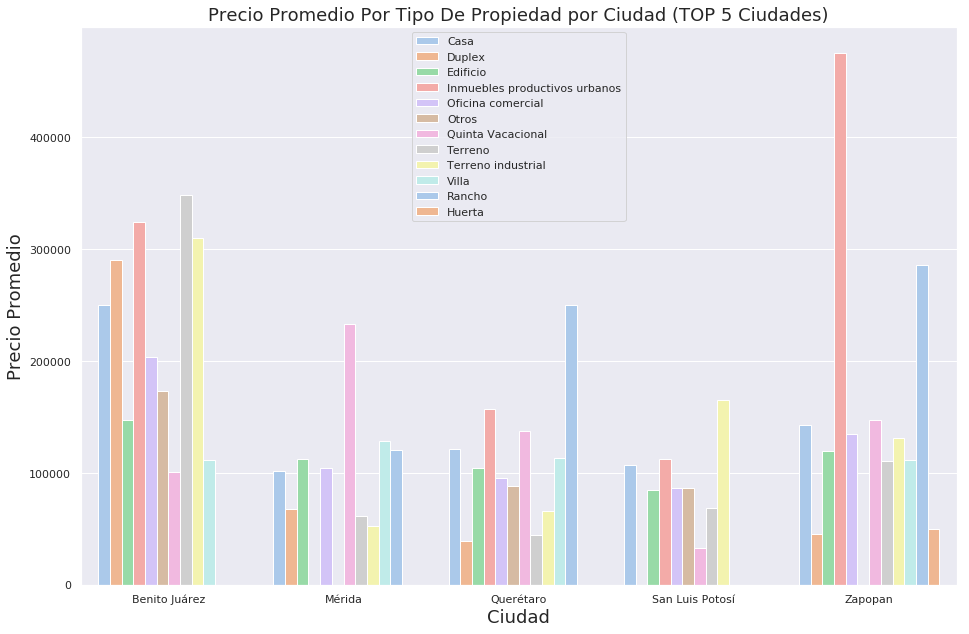

In [17]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
g = sns.barplot(x="ciudad",y="precio(U$S)", hue="tipodepropiedad", data=df_grupo_ciudad, palette="pastel")
g.legend(loc='upper center')
g.set_title("Precio Promedio Por Tipo De Propiedad por Ciudad (TOP 5 Ciudades)", fontsize=18)
g.set_xlabel("Ciudad", fontsize=18)
g.set_ylabel("Precio Promedio", fontsize=18)


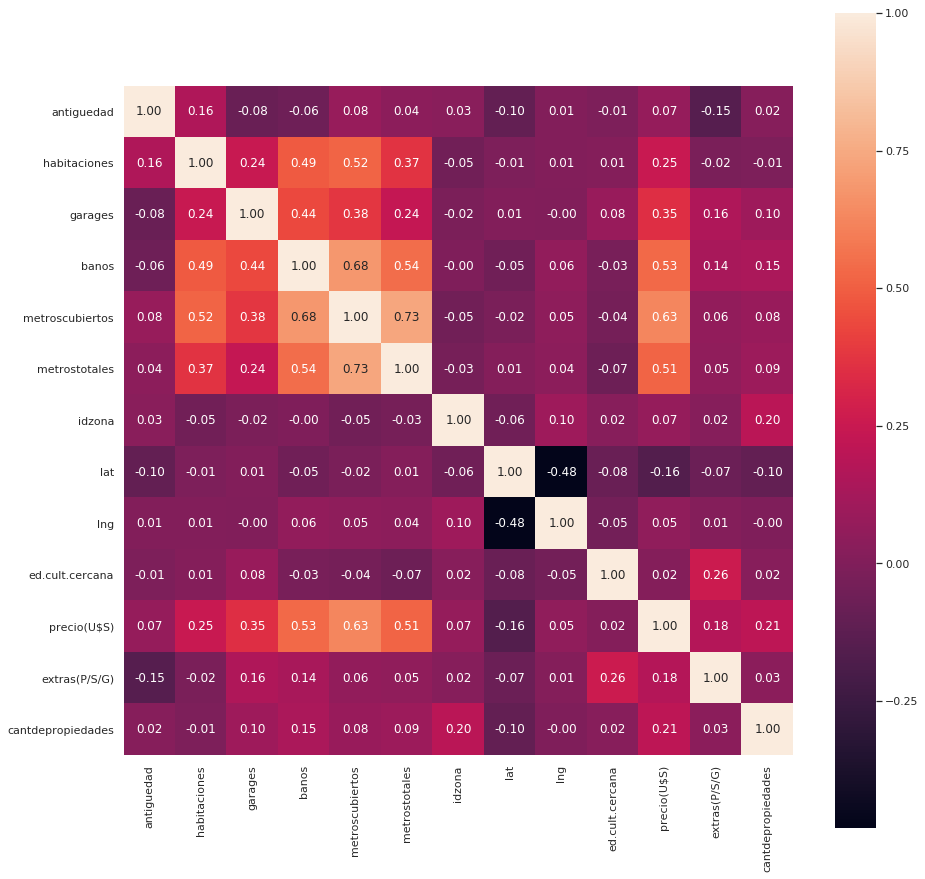

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f');

In [19]:
"EVOLUCION DEL PRECIO DE CADA TIPO DE PROPIEDAD DE LA CIUDAD MAS IMPORTANTE (QUERETARO)"
import calendar

df_evolucion_precio = df
df_evolucion_precio = df_evolucion_precio[df_evolucion_precio['ciudad'] == 'Querétaro']
df_evolucion_precio['tipodepropiedad'].value_counts()


Casa                             10366
Edificio                           902
Terreno                            872
Oficina comercial                  459
Otros                               20
Duplex                              15
Inmuebles productivos urbanos        5
Quinta Vacacional                    2
Villa                                2
Terreno industrial                   2
Rancho                               1
Name: tipodepropiedad, dtype: int64

In [20]:
df_evolucion_precio['cantidadPorTipo'] = df_evolucion_precio.groupby('tipodepropiedad')['tipodepropiedad'].transform('count')
df_evolucion_filtrado = df_evolucion_precio[df_evolucion_precio['cantidadPorTipo']>=459]
df_evolucion_filtrado.head(15)
df_evolucion_filtrado['anio'] = df_evolucion_filtrado['fecha'].dt.year
df_evolucion_filtrado['tipodepropiedad'].value_counts()
df_evolucion_filtrado.sample()

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,ed.cult.cercana,precio(U$S),extras(P/S/G),cantdepropiedades,cantidadPorTipo,anio
id,,,,,,,,,,,,,,,,,,,,,,
44499,aproveche uno de los pocos terrenos a la venta...,<p>terreno ubicado en una de la zonas mas cént...,Terreno,NaN,Querétaro,Querétaro,nan,nan,nan,nan,nan,330.00,nan,20.61,-100.39,2015-02-05,0.00,99000.00,0.00,12646.00,872,2015


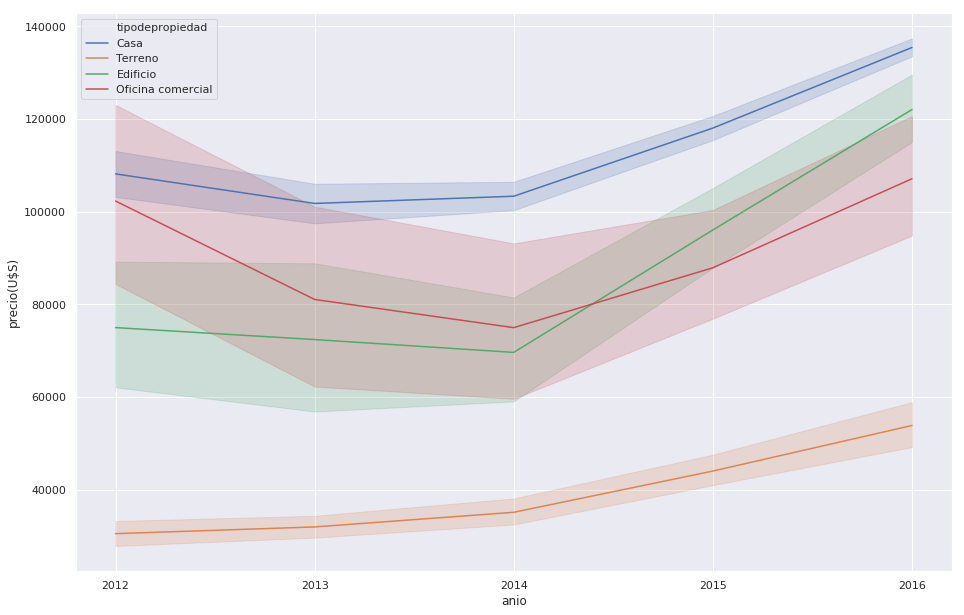

In [21]:
sns.set(style='darkgrid')
g = sns.lineplot(x="anio", y="precio(U$S)",
             hue="tipodepropiedad",
             data=df_evolucion_filtrado)
g.set_xticks([2012,2013,2014,2015,2016])

In [22]:
#evolucion_group = df_evolucion_precio.groupby(['anio','tipodepropiedad','mes'])['precio(U$S)']
#evolucion_ser = evolucion_group.aggregate(np.mean)
#evolucion_df2 = evolucion_ser.unstack()
#evolucion_df2 = evolucion_df2.reset_index()
#evolucion_df2.head()

In [23]:
a = pd.read_csv("./data/train.csv")
DF = a[a['provincia'] == 'Distrito Federal'].copy()
#DF.sample(5)

FileNotFoundError: [Errno 2] File b'./data/train.csv' does not exist: b'./data/train.csv'

In [ ]:
DF.tipodepropiedad.value_counts().plot(kind = "bar")

In [ ]:
#DF.tipodepropiedad.value_counts()

In [ ]:
#DF.fecha.sample(3)

In [ ]:
DF_fecha = DF.copy()
mask = (DF_fecha['fecha'] < '2016-12')
DF_fecha = DF_fecha.loc[mask]
DF_fecha.sample(10)
DF_fecha.fecha = DF_fecha.fecha.apply(lambda fecha: fecha[:-12])
#DF_fecha.sample(2)

In [ ]:
DF_fecha.fecha.value_counts().sort_index().plot(kind = 'line',title='Cantidad de Propiedades Publicadas en Distrito Federal')

In [ ]:
df2 = a[a['provincia'] == 'Distrito Federal'].copy()
df2 = df2[df2['tipodepropiedad'] == 'Edificio']
mask = (df2['fecha'] < '2016-12')
df2 = df2.loc[mask]
df2.fecha = df2.fecha.apply(lambda fecha: fecha[:-15])

In [ ]:
group = df2.groupby('fecha')['tipodepropiedad']
group.count().plot(kind='bar',title='Cantidad De Edificios Publicados Por Año en Distrito Federal')

In [ ]:
group = df2.groupby('fecha')['precio']
s = group.aggregate(np.mean)
s.plot(kind='bar', title = 'Promedio precio edificios en DF por anio')

In [ ]:
df3 = a.copy()
df3.fecha = df3.fecha.apply(lambda fecha: fecha[:-12])
df3.fecha.value_counts().sort_index().plot('bar',title='PRUEBA DE QUE LOS DATOS DE 12-16 NO SE PUEDEN USAR')

In [ ]:
df = pd.read_csv("./data/train.csv")
df["fecha"].isnull().value_counts()

Vamos a explorar el mes de diciembre de 2016. 

In [ ]:
df19 = a.copy()
df19["fecha"] = pd.to_datetime(df19["fecha"])
#d = diciembre_2016.loc[diciembre_2016.fecha.dt.month != 12].copy()
diciembre_2016 = df19.loc[(df19["fecha"].dt.year == 2016) & (df19["fecha"].dt.month == 12)]
g = diciembre_2016["fecha"].value_counts().sort_index().plot(kind = 'bar')
#d = d["fecha"].unique()
#cant_dias = d.fecha.count()

#print(cant_dias)
#ventas_promedio_por_dia = len(d.index)/30

**Hay algo muuy raro el 2/12 /16 que no tiene casi publicaciones.** Y es llamativo que las publicaciones por día de diciembre tienen valores **muy** altos en comparacion con el resto de los meses del resto de los años. Por ejemplo solo entre el 1ro y 2do dia de diciembre hubo tantas publicaciones como todo el mes de febrero del 2013.Aparece uno solo pues todos tienen como hora 00:00 minetras que ese tiene una hora distinta.

#### Para fines comparativos veremos la evolucion de las publicaciones por día el mes anterior

In [ ]:
diciembre_2016.fecha.dt.day.value_counts().sort_index().plot(kind='bar', title='Publicaciones por dia en el mes de diciembre del 2016')

In [ ]:
noviembre_2016 = df19.loc[(df19["fecha"].dt.year == 2016) & (df19["fecha"].dt.month == 11)]
noviembre_2016["fecha"].dt.day.value_counts().sort_index().plot(kind = 'bar', title='Publicaciones por dia en el mes de noviembre del 2016')

In [ ]:
df4 = df3.copy()
mask = (df4['fecha'] < '2016-12')
df4 = df4.loc[mask]
#df4.fecha = df4.fecha.apply(lambda fecha: fecha[:-3])
df4.fecha.value_counts().sort_index().plot(kind = 'line', title = 'Aumento popularidad zonaprop')

Buscamos ver en que mes son los picos

In [ ]:
df5 = a.copy()
df5["fecha"] = pd.to_datetime(df5["fecha"])
ventas_2012 = df5.loc[df5["fecha"].dt.year == 2012]
ventas_2012["mes"] = ventas_2012["fecha"].dt.month
ventas_promedio_por_mes = len(ventas_2012.index)/12


g = ventas_2012.mes.value_counts().sort_index().plot(kind = 'bar')
g.axhline(ventas_promedio_por_mes, color='r')

Vemos que hay picos extraños en los meses 8, 9 y 10 del 2012 superiores a la media de publicaciones por mes, por lo tanto vamos a hacer un análisis mas profundo

In [ ]:
ventas_2012_8 = ventas_2012.loc[ventas_2012["fecha"].dt.month == 8]
ventas_2012_8["fecha"].value_counts().sort_index().plot(kind ='bar')

Vemos como hay dos días con una actividad muy inusual en la página durante el mes de Agosto de 2012. 

In [ ]:
df6 = a.copy()
df6["fecha"] = pd.to_datetime(df6["fecha"])
ventas_2013 = df6.loc[df6["fecha"].dt.year == 2013]
ventas_2013["mes"] = ventas_2013["fecha"].dt.month
ventas_2013.mes.value_counts().sort_index().plot(kind = 'bar')

In [ ]:
df5["fecha"] = pd.to_datetime(df5["fecha"])
ventas_2014 = df5.loc[df5["fecha"].dt.year == 2014]
ventas_2014["mes"] = ventas_2014["fecha"].dt.month
ventas_2014.mes.value_counts().sort_index().plot(kind = 'bar')

In [ ]:
df5["fecha"] = pd.to_datetime(df5["fecha"])
ventas_2015 = df5.loc[df5["fecha"].dt.year == 2015]
ventas_2015["mes"] = ventas_2015["fecha"].dt.month
ventas_2015.mes.value_counts().sort_index().plot(kind = 'bar')

In [ ]:
df5["fecha"] = pd.to_datetime(df5["fecha"])
ventas_2016 = df5.loc[(df5["fecha"].dt.year == 2016) & (df5["fecha"].dt.month != 12)]
ventas_2016["mes"] = ventas_2016["fecha"].dt.month
ventas_2016.mes = ventas_2016.mes
ventas_2016.mes.value_counts().sort_index().plot(kind = 'bar')

Haciendo un analisis un poco mas detallado. Podemos ver que en 2012 hay un pico anormal 

In [ ]:
dfMio = pd.read_csv(path)
dfMio.head()

In [ ]:
dfMio['cantidad'] = 1
fechas = dfMio[['fecha', 'cantidad']].copy()
fechas.fecha = pd.to_datetime(fechas.fecha)
fechas['mes'] = fechas.fecha.dt.month
fechas['año'] = fechas.fecha.dt.year
fechas = fechas.loc[fechas.mes >= 11]
fechas = fechas.groupby(['año', 'mes']).agg({'cantidad':sum}).reset_index()
plt.figure(figsize=(15, 7))
sns.barplot(x="año",y="cantidad", hue="mes", data=fechas, palette="colorblind").set_title('Cantidad de propiedades publicadas por año en diciembre y noviembre')